<a href="https://colab.research.google.com/github/chamudithamk/ME422-B2-Lab-Group/blob/main/Vibration/E_20_218_Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Activity 1**

Derive the 2-dof freedom model that will capture the first two
dominant modes of small amplitude vibration of the system.
Consider the schematic diagram of the experimental setup illustrated below along with the corresponding notations

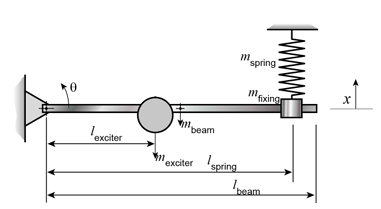

Assuming negligible damping and small-amplitude vibrations, the dynamic behavior of the system can be accurately represented by the solution of the governing partial differential equation given below

$$
\frac{\partial^2 y}{\partial t^2}
+ \frac{EI}{\rho A}\frac{\partial^4 y}{\partial x^4}
+ \frac{P}{\rho A}\frac{\partial^2 y}{\partial x^2}
= q(t,x)
$$


Here,
𝑦
y represents the transverse displacement of the beam,
𝑃
P is the axial compressive force,
𝜌
ρ is the material density,
𝐸
E is Young’s modulus,
𝐼
I is the second moment of area, and
𝐴
A is the cross-sectional area of the uniform beam. In this section, the axial load is assumed to be constant


since Axial force is zero, apply P = 0

$$
\frac{\partial^2 y}{\partial t^2}
+ \frac{EI}{\rho A}\frac{\partial^4 y}{\partial x^4}
= q(t,x)
$$


The solutions of the governing PDE that satisfy the boundary conditions

$$
y(0,t)=0, \quad y(L,t)=0,
$$

$$
\frac{\partial^2 y}{\partial x^2}(0,t)=0, \quad \frac{\partial^2 y}{\partial x^2}(L,t)=0
$$


accurately represent the physical behavior of the beam, where
𝐿
L is the beam length

$$
\text{Let } \mathcal{F} \text{ denote the infinite-dimensional vector space of twice differentiable functions defined on the interval } [0,L].
$$

$$
\text{Define the linear operator } H : \mathcal{F} \rightarrow \mathcal{F} \text{ by}
$$

$$
H = \frac{EI}{\rho A}\frac{\partial^4}{\partial x^4}.
$$

$$
\text{Then the equation of motion can be written as}
$$

$$
\frac{\partial^2 y}{\partial t^2} + Hy = q(t,x).
$$


$$
\text{The operator } H \text{ maps a transverse deflection profile to the corresponding acceleration produced solely by beam bending,}
$$

$$
\text{subject to the beam’s boundary conditions. Let } H \text{ have distinct positive eigenvalues } \{\omega_k^2\}_{k=1}^{\infty}
$$

$$
\text{with associated eigenfunctions } \{\psi_k(x)\}_{k=1}^{\infty}, \text{ which represent the vibration mode shapes.}
$$

$$
\text{The corresponding eigenvalue problem is defined as}
$$

$$
H\psi_k(x) = \omega_k^2 \psi_k(x).
$$

$$
\text{Substituting the expression for } H, \text{ we obtain}
$$

$$
\frac{EI}{\rho A}\frac{d^4 \psi_k(x)}{dx^4} = \omega_k^2 \psi_k(x).
$$

$$
\text{This can be rearranged as}
$$

$$
\frac{d^4 \psi_k(x)}{dx^4} = \frac{\rho A \omega_k^2}{EI}\psi_k(x)
= \beta_k^4 \psi_k(x).
$$


General solution for 4th order differential equation

$$
\frac{d^4 \psi(x)}{dx^4} = \beta^4 \psi(x)
$$

$$
\psi(x) = C_1 e^{\beta x} + C_2 e^{-\beta x}
+ C_3 \cos(\beta x) + C_4 \sin(\beta x)
$$


$$
\psi(x) = C_1 e^{\beta x} + C_2 e^{-\beta x}
+ C_3 \cos(\beta x) + C_4 \sin(\beta x)
$$

$$
\psi(0)= C_1 + C_2 + C_3 = 0
$$

$$
\psi'(0)= \beta(C_1 - C_2 + C_4)=0
$$

$$
\psi''(L)= C_1 e^{\beta L} + C_2 e^{-\beta L}
- C_3 \cos(\beta L) - C_4 \sin(\beta L)=0
$$

$$
\psi'''(L)= C_1 e^{\beta L} - C_2 e^{-\beta L}
+ C_3 \sin(\beta L) - C_4 \cos(\beta L)=0
$$


$$
\text{The above equations form a linear homogeneous system:}
$$

$$
H(\beta)
\begin{bmatrix}
C_1\\
C_2\\
C_3\\
C_4
\end{bmatrix}
= 0
$$

$$
\text{where } H(\beta) \in \mathbb{M}_{4\times 4}
$$

$$
H(\beta)=
\begin{bmatrix}
1 & 1 & 1 & 0\\
1 & -1 & 0 & 1\\
e^{\beta L} & e^{-\beta L} & -\cos(\beta L) & -\sin(\beta L)\\
e^{\beta L} & -e^{-\beta L} & \sin(\beta L) & -\cos(\beta L)
\end{bmatrix}
$$


Characteristic determinant

In [14]:
import numpy as np
from numpy.linalg import det
from scipy.optimize import brentq
from scipy.linalg import svd
import matplotlib.pyplot as plt


# ========= Characteristic Determinant =========
def char_det(beta, L):
    bL = beta * L

    H = np.array([
        [1,  1,  1,  0],
        [1, -1,  0,  1],
        [np.exp(bL), np.exp(-bL), -np.cos(bL), -np.sin(bL)],
        [np.exp(bL),-np.exp(-bL),  np.sin(bL), -np.cos(bL)]
    ])

    return det(H)


Root finder for β values

In [15]:
def find_betas(L, n_roots=2, beta_max=40):
    betas = []
    beta_vals = np.linspace(0.1, beta_max, 5000)

    f_vals = [char_det(b, L) for b in beta_vals]

    for i in range(len(beta_vals)-1):
        if f_vals[i] * f_vals[i+1] < 0:
            root = brentq(char_det, beta_vals[i], beta_vals[i+1], args=(L,))
            betas.append(root)

            if len(betas) >= n_roots:
                break

    return np.array(betas)


Solve for coefficients
𝐶
1
,
𝐶
2
,
𝐶
3
,
𝐶
4

	​


	​


In [16]:
# ========= Mode Shape Coefficients =========
def mode_shape_coefficients(beta, L):
    bL = beta * L

    H = np.array([
        [1,  1,  1,  0],
        [1, -1,  0,  1],
        [np.exp(bL), np.exp(-bL), -np.cos(bL), -np.sin(bL)],
        [np.exp(bL),-np.exp(-bL),  np.sin(bL), -np.cos(bL)]
    ])

    # SVD to get null-space vector
    U, S, Vh = svd(H)
    v = Vh[-1, :]   # smallest singular value vector

    C1, C2, C3, C4 = v
    return C1, C2, C3, C4


$$
\text{The eigenvalues of the operator } H \text{ are given by}
$$

$$
\{\omega_k^2\}_{k=1}^{\infty}
=
\left\{
\frac{EI}{\rho A}\beta_k^4
\right\}_{k=1}^{\infty},
$$

$$
\text{where the parameters } \beta_k \text{ are obtained from the numerical solution of the characteristic equation.}
$$

$$
\text{The corresponding eigenfunctions (mode shapes) are}
$$

$$
\{\psi_k(x)\}_{k=1}^{\infty}
=
\left\{
C_{1k} e^{\beta_k x}
+ C_{2k} e^{-\beta_k x}
+ C_{3k} \cos(\beta_k x)
+ C_{4k} \sin(\beta_k x)
\right\}_{k=1}^{\infty},
$$

$$
\text{where the constants } C_{1k}, C_{2k}, C_{3k}, \text{ and } C_{4k}
\text{ are computed using the numerical procedure implemented above.}
$$


**Forced Vibration**

When the oscillator is switched on, the system experiences forced vibration as a result of the oscillating force
𝑄
Q.

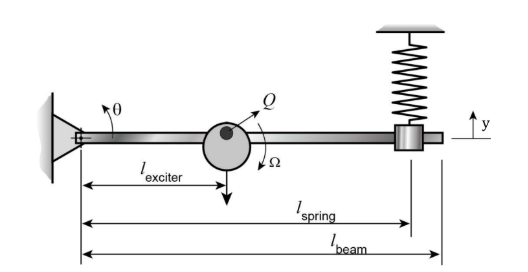

In the absence of base excitation, the external load acting on the beam is assumed to be

$$
q(x,t) = Q \sin(\Omega t)\,\delta(x - l_{\text{exciter}}).
$$

The system can then be modeled as a set of decoupled, forced, and damped single-degree-of-freedom oscillators for each vibration mode \(k\), such that

$$
\ddot{y} + C\dot{y} + Hy = q(x,t)
$$

which leads to the modal equation

$$
m_k \ddot{z}_k + 2\zeta_k \omega_k m_k \dot{z}_k + m_k \omega_k^2 z_k
= \langle \psi_k(x), q(x,t) \rangle.
$$

Here, the modal damping ratio and modal mass are defined as

$$
\zeta_k = \frac{c}{2\omega_k},
$$

$$
m_k = \int_{0}^{l_{\text{beam}}} \rho A\,\psi_k^2(x)\,dx.
$$

The modal masses normalize the arbitrary scaling introduced by the choice of the mode shape coefficients.

Solving the decoupled ordinary differential equation for each mode \(k\) yields the steady-state response

$$
z_k(t) = X_k(\Omega)\cos\!\big(\Omega t + \phi_k(\Omega)\big),
$$

where $X_k(\Omega)$ denotes the steady-state amplitude and $\phi_k(\Omega)$ represents the phase lag of the $k$th modal coordinate at the forcing frequency $\Omega$.


Let us now derive explicit expressions for the quantities defined above.

The mode shapes are orthonormal with respect to the inner product defined as

$$
\langle \psi_k(x), q(x,t) \rangle
=
\int_{0}^{l_{\text{beam}}} \psi_k(x)\,q(x,t)\,dx.
$$

Substituting the expression for the external forcing,

$$
q(x,t) = Q\sin(\Omega t)\,\delta(x - l_{\text{exciter}}),
$$

the inner product becomes

$$
\langle \psi_k(x), q(x,t) \rangle
=
\int_{0}^{l_{\text{beam}}} \psi_k(x)\,Q\sin(\Omega t)\,
\delta(x - l_{\text{exciter}})\,dx.
$$

Evaluating the integral using the sifting property of the Dirac delta function yields

$$
\langle \psi_k(x), q(x,t) \rangle
=
Q\sin(\Omega t)\,\psi_k(l_{\text{exciter}}).
$$

By definition, the steady-state amplitude of the $k$th modal coordinate is given by

$$
X_k(\Omega)
=
\frac{\left|\langle \psi_k(x), q(x,t) \rangle\right|}
{m_k\sqrt{(\omega_k^2-\Omega^2)^2 + 4\zeta_k^2\Omega^2\omega_k^2}}.
$$

Substituting the evaluated modal force term gives

$$
X_k(\Omega)
=
\frac{Q\,\psi_k(l_{\text{exciter}})}
{m_k\sqrt{(\omega_k^2-\Omega^2)^2 + 4\zeta_k^2\Omega^2\omega_k^2}}.
$$

The corresponding phase lag for the $k$th mode is expressed as

$$
\phi_k(\Omega)
=
\arctan\!\left(
\frac{2\zeta_k\Omega\omega_k}{\omega_k^2-\Omega^2}
\right).
$$

The infinite-dimensional response of the system can therefore be written as

$$
y(t,x)
=
\sum_{k=1}^{\infty} z_k(t)\psi_k(x)
=
\sum_{k=1}^{\infty}
X_k(\Omega)\cos\!\big(\Omega t + \phi_k(\Omega)\big)\psi_k(x).
$$


\textbf{Reduction to a 2-DOF Model with a Localized Spring–Damper Attachment}

By truncating the infinite-dimensional response to the first two dominant vibration modes, the transverse displacement of the beam can be approximated as

$$
y(t,x) \approx
X_1(\Omega)\cos\!\big(\Omega t + \phi_1(\Omega)\big)\psi_1(x)
+
X_2(\Omega)\cos\!\big(\Omega t + \phi_2(\Omega)\big)\psi_2(x).
$$

The corresponding two-degree-of-freedom system can be expressed in matrix form as

$$
\underbrace{
\begin{bmatrix}
m_1 & 0 \\
0 & m_2
\end{bmatrix}
}_{M_{\text{beam}}}
\begin{bmatrix}
\ddot{z}_1 \\
\ddot{z}_2
\end{bmatrix}
+
\underbrace{
\begin{bmatrix}
2\zeta_1\omega_1 m_1 & 0 \\
0 & 2\zeta_2\omega_2 m_2
\end{bmatrix}
}_{C_{\text{beam}}}
\begin{bmatrix}
\dot{z}_1 \\
\dot{z}_2
\end{bmatrix}
+
\underbrace{
\begin{bmatrix}
\omega_1^2 m_1 & 0 \\
0 & \omega_2^2 m_2
\end{bmatrix}
}_{K_{\text{beam}}}
\begin{bmatrix}
z_1 \\
z_2
\end{bmatrix}
=
\underbrace{
\begin{bmatrix}
Q\,\psi_1(l_{\text{exciter}})\sin(\Omega t) \\
Q\,\psi_2(l_{\text{exciter}})\sin(\Omega t)
\end{bmatrix}
}_{F_{\text{exciter}}}.
$$

The effects of the localized spring and viscous damper attachment are incorporated in the subsequent formulation.


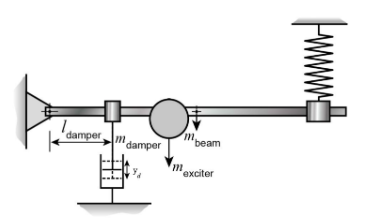

\textbf{Part I: Inclusion of Additional Mass Effects}

For improved accuracy, the formulation accounts for the effective contribution of the spring mass, namely the portion that participates in the motion and adds to the total inertia of the system. According to Rayleigh’s theory, this effective contribution is equal to one-third of the spring mass. In addition, the mass associated with the spring–beam connection must also be considered.

$$
m_{\text{eff}} = \frac{1}{3}m_{\text{spring}} + m_{\text{fixed}}.
$$

The transverse acceleration at the location of the spring attachment is expressed as

$$
\ddot{y}(l_{\text{spring}},t)
=
\ddot{z}_1(t)\psi_1(l_{\text{spring}})
+
\ddot{z}_2(t)\psi_2(l_{\text{spring}}).
$$

The inertial force generated by the attached mass is therefore given by

$$
F_{\text{inertia}}(t)
=
m_{\text{eff}}\,\ddot{y}(l_{\text{spring}},t).
$$

Projecting this inertial force onto the modal coordinates results in

$$
\begin{bmatrix}
F_1^{(m)} \\
F_2^{(m)}
\end{bmatrix}
=
M_{\text{spring}}
\begin{bmatrix}
\ddot{z}_1 \\
\ddot{z}_2
\end{bmatrix},
$$

where the additional mass matrix associated with the spring attachment is defined as

$$
M_{\text{spring}}
=
m_{\text{eff}}
\begin{bmatrix}
\psi_1^2(l_{\text{spring}}) &
\psi_1(l_{\text{spring}})\psi_2(l_{\text{spring}}) \\
\psi_1(l_{\text{spring}})\psi_2(l_{\text{spring}}) &
\psi_2^2(l_{\text{spring}})
\end{bmatrix}.
$$

In a similar manner, the additional mass contributions arising from the damper and the exciter can be represented as

$$
M_{\text{damper}}
=
m_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) \\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix},
$$

and

$$
M_{\text{exciter}}
=
m_{\text{exciter}}
\begin{bmatrix}
\psi_1^2(l_{\text{exciter}}) &
\psi_1(l_{\text{exciter}})\psi_2(l_{\text{exciter}}) \\
\psi_1(l_{\text{exciter}})\psi_2(l_{\text{exciter}}) &
\psi_2^2(l_{\text{exciter}})
\end{bmatrix}.
$$


\textbf{Part II: Inclusion of the Damper Attachment}

By applying the constitutive relation for a viscous damper, the damping force can be expressed as

$$
F_{\text{damper}}(t) = c_{\text{damper}}\,\dot{y}(l_{\text{damper}},t).
$$

Under the two-mode approximation, the transverse velocity at the damper location is given by

$$
\dot{y}(l_{\text{damper}},t)
=
\dot{z}_1(t)\psi_1(l_{\text{damper}})
+
\dot{z}_2(t)\psi_2(l_{\text{damper}}).
$$

The modal damping force acting on the $k$th mode is obtained by projection, yielding

$$
F_k^{(c)}(t)
=
c_{\text{damper}}
\big(
\dot{z}_1\psi_1(l_{\text{damper}})
+
\dot{z}_2\psi_2(l_{\text{damper}})
\big)
\psi_k(l_{\text{damper}}).
$$

This leads to the following matrix representation:

$$
\begin{bmatrix}
F_1^{(c)} \\
F_2^{(c)}
\end{bmatrix}
=
C_{\text{damper}}
\begin{bmatrix}
\dot{z}_1 \\
\dot{z}_2
\end{bmatrix},
$$

where the additional damping matrix associated with the damper attachment is defined as

$$
C_{\text{damper}}
=
c_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) \\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix}.
$$

The dynamic and inertial effects of the spring, damper, and exciter can now be incorporated into the reduced two-degree-of-freedom model.

The final reduced-order governing equation is given by

$$
\big(
M_{\text{beam}} + M_{\text{spring}} + M_{\text{damper}} + M_{\text{exciter}}
\big)\ddot{z}
+
\big(
C_{\text{beam}} + C_{\text{damper}}
\big)\dot{z}
+
K_{\text{beam}}z
=
F_{\text{exciter}},
$$
where \( M, C, K \in \mathbb{R}^{2\times 2} \) and \( z, F \in \mathbb{R}^{2} \).


In [17]:
# =========================================================
# Beam Geometric and Material Parameters
# =========================================================
b = 0.025
h = 0.01
A = b * h
m_beam = 1.65
l_beam = 0.815
E = 2e11
I = b * h**3 / 12
rho = m_beam / (A * l_beam)


# =========================================================
# Spring Characteristics
# =========================================================
k_spring = 3800
l_spring = 0.75
m_spring = 0.388
m_fixed = 0.009

# Equivalent rotational stiffness at the beam root
k_theta = k_spring * l_spring**2


# =========================================================
# Damper Parameters
# =========================================================
l_damper = 0.2
m_damper = 0.53


# =========================================================
# Excitation System Properties
# =========================================================
m_exciter = 4.2
l_exciter = 0.4


# =========================================================
# Extraction of the First Two Eigenvalues
# =========================================================
roots = find_betas(l_beam, n_roots=2)
beta1, beta2 = roots

print(f"beta1 = {beta1:.4f}, beta2 = {beta2:.4f}")


# =========================================================
# Mode Shape Evaluation Function
# =========================================================
def psi(x, beta, l_beam):
    C1, C2, C3, C4 = mode_shape_coefficients(beta, l_beam)
    return (
        C1*np.cosh(beta*x)
        + C2*np.sinh(beta*x)
        + C3*np.cos(beta*x)
        + C4*np.sin(beta*x)
    )


# =========================================================
# Mode Shape Values at Attachment Locations
# =========================================================
psi1_spring = psi(l_spring, beta1, l_beam)
psi2_spring = psi(l_spring, beta2, l_beam)

psi1_damper = psi(l_damper, beta1, l_beam)
psi2_damper = psi(l_damper, beta2, l_beam)

psi1_exciter = psi(l_exciter, beta1, l_beam)
psi2_exciter = psi(l_exciter, beta2, l_beam)

print(f"psi1(l_spring) = {psi1_spring:.4f}, psi2(l_spring) = {psi2_spring:.4f}")
print(f"psi1(l_damper) = {psi1_damper:.4f}, psi2(l_damper) = {psi2_damper:.4f}")
print(f"psi1(l_exciter) = {psi1_exciter:.4f}, psi2(l_exciter) = {psi2_exciter:.4f}")


# =========================================================
# Modal Mass Calculation
# =========================================================
def modal_mass(beta):
    integrand = lambda x: rho * A * psi(x, beta, l_beam)**2
    m, _ = quad(integrand, 0, l_beam)
    return m

m1 = modal_mass(beta1)
m2 = modal_mass(beta2)


# =========================================================
# Natural Frequencies of the Beam (Uncoupled)
# =========================================================
omega1 = beta1**2 * np.sqrt(E*I/(rho*A))
omega2 = beta2**2 * np.sqrt(E*I/(rho*A))

print(f"Modal mass m1 = {m1:.4f} kg, m2 = {m2:.4f} kg")
print(f"Natural frequencies: omega1 = {omega1:.4f} rad/s, omega2 = {omega2:.4f} rad/s")

beta1 = 2.3007, beta2 = 5.7596
psi1(l_spring) = -2.3839, psi2(l_spring) = 21.1762
psi1(l_damper) = 0.0063, psi2(l_damper) = 1.1126
psi1(l_exciter) = -0.7157, psi2(l_exciter) = 3.6505
Modal mass m1 = 2.7472 kg, m2 = 172.1544 kg
Natural frequencies: omega1 = 75.9393 rad/s, omega2 = 475.9036 rad/s


In [18]:
# =========================================================
# Beam Modal Mass and Stiffness Matrices
# =========================================================
M_beam = np.array([[m1, 0.0],
                   [0.0, m2]])

K_beam = np.array([[m1 * omega1**2, 0.0],
                   [0.0, m2 * omega2**2]])


# =========================================================
# Effective Mass Contribution from the Spring Assembly
# =========================================================
m_eff_spring = (1/3) * m_spring + m_fixed

M_spring = m_eff_spring * np.array([
    [psi1_spring**2, psi1_spring * psi2_spring],
    [psi1_spring * psi2_spring, psi2_spring**2]
])


# =========================================================
# Additional Mass Matrix due to the Damper Attachment
# =========================================================
M_damper = m_damper * np.array([
    [psi1_damper**2, psi1_damper * psi2_damper],
    [psi1_damper * psi2_damper, psi2_damper**2]
])


# =========================================================
# Mass Matrix Associated with the Exciter Assembly
# =========================================================
M_exciter = m_exciter * np.array([
    [psi1_exciter**2, psi1_exciter * psi2_exciter],
    [psi1_exciter * psi2_exciter, psi2_exciter**2]
])


# =========================================================
# Utility Function for Neatly Displaying Matrices
# =========================================================
def print_matrix(name, mat):
    print(f"{name}:")
    for row in mat:
        print("  [" + ", ".join(f"{val:10.3f}" for val in row) + "]")
    print()  # Add spacing between outputs


# =========================================================
# Display All Computed Mass and Stiffness Matrices
# =========================================================
print_matrix("M_beam", M_beam)
print_matrix("M_spring", M_spring)
print_matrix("M_damper", M_damper)
print_matrix("M_exciter", M_exciter)
print_matrix("K_beam", K_beam)


M_beam:
  [     2.747,      0.000]
  [     0.000,    172.154]

M_spring:
  [     0.786,     -6.983]
  [    -6.983,     62.033]

M_damper:
  [     0.000,      0.004]
  [     0.004,      0.656]

M_exciter:
  [     2.151,    -10.973]
  [   -10.973,     55.969]

K_beam:
  [ 15842.789,      0.000]
  [     0.000, 38990268.018]



\textbf{Activity 2: Estimation of Damping Ratios for the Two Dominant Modes}

We begin by recalling the governing equation of motion for the system with the attached components, which is given by

$$
M\ddot{z} + C\dot{z} + Kz = F_{\text{exciter}},
$$

where the system matrices are defined as

$$
M = M_{\text{beam}} + M_{\text{spring}} + M_{\text{damper}} + M_{\text{exciter}}, \quad
C = C_{\text{beam}} + C_{\text{damper}}, \quad
K = K_{\text{beam}}.
$$

To analyze the free vibration characteristics of the system, we consider the homogeneous form of the above equation,

$$
M\ddot{z} + C\dot{z} + Kz = 0.
$$

Assuming a solution of the form

$$
z(t) = \phi e^{i\omega t},
$$

and neglecting damping effects, the undamped response is used to determine the natural frequencies and mode shapes of the system. Substitution of this assumed solution leads to the eigenvalue problem

$$
(K - \omega^2 M)\phi = 0,
$$

with the corresponding characteristic equation

$$
\det(K - \omega^2 M) = 0.
$$

Solving this eigenvalue problem yields two natural frequencies, \(\omega_1\) and \(\omega_2\), along with their associated eigenvectors \(\phi_1\) and \(\phi_2\), where \(\phi \in \mathbb{R}^2\).

The modal matrix is then constructed as

$$
\Phi =
\begin{bmatrix}
\phi_1 & \phi_2
\end{bmatrix}.
$$

We now proceed to compute the numerical values of the above quantities.


In [20]:
from scipy.linalg import eigh
# =========================================================
# Computation of Natural Frequencies for the Complete System
# =========================================================
M = M_beam + M_spring + M_damper + M_exciter
K = K_beam

eigvals, eigvecs = eigh(K, M)
omega_n = np.sqrt(eigvals)

print("Natural frequencies considering attached components:")
for i, w in enumerate(omega_n, 1):
    print(f"Mode {i}: {w:.3f} rad/s = {w/(2*np.pi):.3f} Hz")


# =========================================================
# Modal Matrix Corresponding to the Full System
# =========================================================
Phi = eigvecs
print_matrix("Modal Matrix", Phi)


Natural frequencies considering attached components:
Mode 1: 52.682 rad/s = 8.385 Hz
Mode 2: 408.935 rad/s = 65.084 Hz
Modal Matrix:
  [    -0.418,      0.210]
  [     0.001,      0.065]



Consider the introduction of a new set of generalized coordinates \( q(t) \), defined through the modal transformation

$$
z(t) = \Phi q(t).
$$

Using this transformation, the forced vibration equation of the system can be expressed as

$$
M\Phi \ddot{q} + C\Phi \dot{q} + K\Phi q = F_{\text{exciter}}.
$$

Premultiplying the above equation by \( \Phi^{T} \), the corresponding modal equations are obtained as

$$
\Phi^{T}M\Phi \ddot{q}
+ \Phi^{T}C\Phi \dot{q}
+ \Phi^{T}K\Phi q
= \Phi^{T}F_{\text{exciter}}.
$$

Defining the modal mass, damping, and stiffness matrices as

$$
M_m = \Phi^{T}M\Phi, \quad
C_m = \Phi^{T}C\Phi, \quad
K_m = \Phi^{T}K\Phi,
$$

and the modal force vector as

$$
F_m = \Phi^{T}F_{\text{exciter}},
$$

the governing equations in modal coordinates reduce to

$$
M_m \ddot{q} + C_m \dot{q} + K_m q = F_m.
$$

For the undamped eigenvectors of the pair \( (K, M) \), the modal mass and stiffness matrices \( M_m \) and \( K_m \) are diagonal.

Considering the free vibration response, the governing equation becomes

$$
M_m \ddot{q} + C_m \dot{q} + K_m q = 0.
$$

In the modal formulation, each mode behaves as an independent single-degree-of-freedom oscillator provided that the damping matrix does not introduce modal coupling, that is, when \( C_m \) is also diagonal.

From the definition of the modal damping ratio,

$$
\zeta_k = \frac{c_k}{2m_k\omega_k},
$$

the damping ratio of the complete system can be written as

$$
\zeta_k
=
\frac{\phi_k^{T} C \phi_k}
{2\omega_k \phi_k^{T} M \phi_k}.
$$

Since the total damping matrix is given by

$$
C = C_{\text{beam}} + C_{\text{damper}},
$$

and its exact form is not known a priori, an appropriate damping model must be constructed.

It is already known that the beam damping matrix \( C_{\text{beam}} \) is diagonal from the modal reduction of the beam alone, while the contribution from the damper attachment is given by

$$
C_{\text{damper}}
=
c_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) \\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix}.
$$

We now proceed by considering the mode shapes of the beam alone.


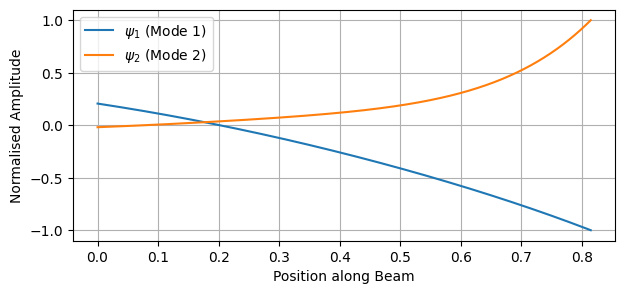

In [24]:
# =========================================================
# Mode Shapes of the Beam Only
# =========================================================
x = np.linspace(0, l_beam, 1000)

psi1 = psi(x, beta1, l_beam)
psi2 = psi(x, beta2, l_beam)

# Normalize mode shapes
psi1_norm = psi1 / np.max(np.abs(psi1))
psi2_norm = psi2 / np.max(np.abs(psi2))

plt.figure(figsize=(7, 3))
plt.plot(x, psi1_norm, label=r'$\psi_1$ (Mode 1)')
plt.plot(x, psi2_norm, label=r'$\psi_2$ (Mode 2)')

plt.xlabel('Position along Beam')
plt.ylabel('Normalised Amplitude')
plt.grid(True)
plt.legend()
plt.show()
